<a href="https://colab.research.google.com/github/Sergey-Kiselev-dev/ML_sem_pub/blob/main/Copy_of_ML_03_selfedu_tf_05c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

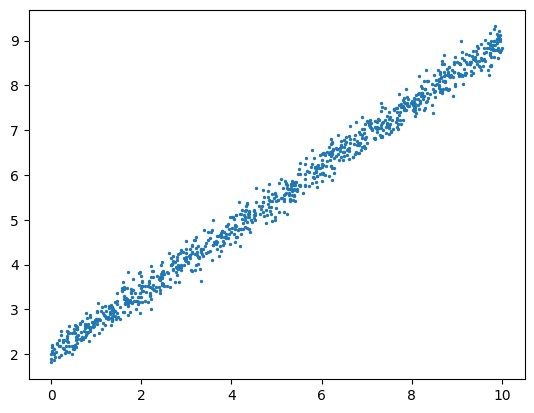

In [ ]:
TOTAL_POINTS = 1000

x = tf.random.uniform(shape=[TOTAL_POINTS], minval=0, maxval=10)
noise = tf.random.normal(shape=[TOTAL_POINTS], stddev=0.2)

k_true = 0.7
b_true = 2.0

y = x * k_true + b_true + noise

plt.scatter(x, y, s=2)
plt.show()

In [ ]:
k = tf.Variable(0.0)
b = tf.Variable(0.0)

f = k * x + b
loss = tf.reduce_mean(tf.square(y - f))

EPOCHS = 50
learning_rate = 0.02

BATCH_SIZE = 100
num_steps = TOTAL_POINTS // BATCH_SIZE

In [ ]:
for n in range(EPOCHS):
  for i_batch in range(num_steps):
    y_batch = y[i_batch * BATCH_SIZE : (i_batch+1) * BATCH_SIZE]
    x_batch = x[i_batch * BATCH_SIZE : (i_batch+1) * BATCH_SIZE]

    with tf.GradientTape() as t:
      f = k * x_batch + b
      loss = tf.reduce_mean(tf.square(y_batch - f))

    dk, db = t.gradient(loss, [k, b])

    k.assign_sub(learning_rate * dk)
    b.assign_sub(learning_rate * db)

In [ ]:
print(k, b, sep="\n")

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.70101076>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0018232>


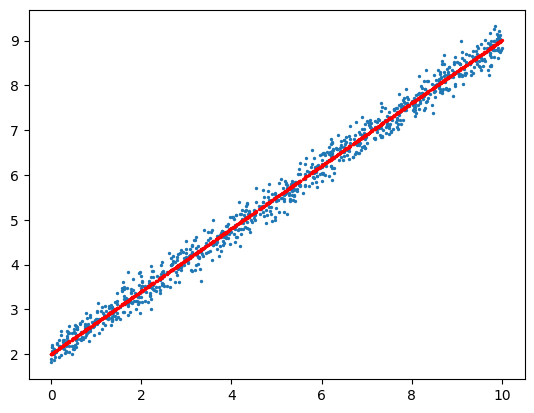

In [ ]:

y_pr = k * x + b
plt.scatter(x, y, s = 2)
plt.scatter(x, y_pr, c = 'r', s = 2)